In [1]:
import json
f = open('Construction PPE Dataset.json')
json_data = json.load(f)
f.close()

In [2]:
dataset = []
for annotated_image_data in json_data.items():
    image_name = annotated_image_data[1]['filename']
    for index, region in enumerate(annotated_image_data[1]['regions']):
        region_value = []
        region_value.append(image_name)
        region_value.append(region['region_attributes']['class'])
        region_value.extend(list(region['shape_attributes'].values()))
        dataset.append(region_value)

In [3]:
import pandas as pd
dataframe = pd.DataFrame(dataset, columns = ('image_name', 'class', 'shape', 'region_centroid (x)', 'region_centroid (y)', 'region_width (w)', 'region_height(h)'))
display(dataframe.head(10))

,image_name,class,shape,region_centroid (x),region_centroid (y),region_width (w),region_height(h)
0,5f19124b2500004b0ec2a311.jpeg,hardhat,rect,267,24,106,60
1,5f19124b2500004b0ec2a311.jpeg,mask,rect,295,99,58,55
2,5f19124b2500004b0ec2a311.jpeg,vest,rect,236,149,181,265
3,5f19124b2500004b0ec2a311.jpeg,boots,rect,239,706,58,73
4,5f19124b2500004b0ec2a311.jpeg,boots,rect,300,725,51,42
5,5TSYZFRSWFDGPLFGYBQKPSRXH4.jpg,hardhat,rect,464,133,108,103
6,5TSYZFRSWFDGPLFGYBQKPSRXH4.jpg,mask,rect,474,247,52,38
7,5TSYZFRSWFDGPLFGYBQKPSRXH4.jpg,vest,rect,364,245,198,183
8,5TSYZFRSWFDGPLFGYBQKPSRXH4.jpg,boots,rect,677,733,115,66
9,5TSYZFRSWFDGPLFGYBQKPSRXH4.jpg,boots,rect,795,674,19,47


In [4]:
dataframe['class'].value_counts()

boots      147
hardhat    146
vest       115
mask        93
Name: class, dtype: int64

In [5]:
from PIL import Image
ROOT = (os.getcwd())
normalized_rect_region_dim = []
for index in range (len(dataframe)):
    filename = dataframe.iloc[index][0]
    image_width, image_height = Image.open(os.path.join(ROOT, "dataset", filename)).size
    # normalizing heght and width of the region (anntated bounding boxes) by dividing them with respective image's height and width
    normalized_rect_region_dim.append((dataframe.iloc[index][5]/image_width, dataframe.iloc[index][6]/image_height))


In [6]:
import numpy as np
normalized_rect_region_dim = np.array(normalized_rect_region_dim)

[]

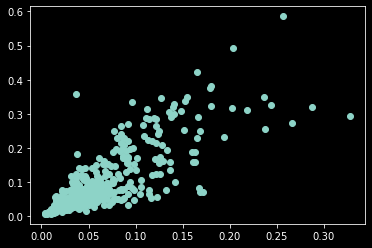

In [7]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

scatter_x = []
scatter_y = []
for x, y in normalized_rect_region_dim:
    scatter_x.append(x)
    scatter_y.append(y)

plt.scatter(np.array(scatter_x), np.array(scatter_y))
plt.plot()

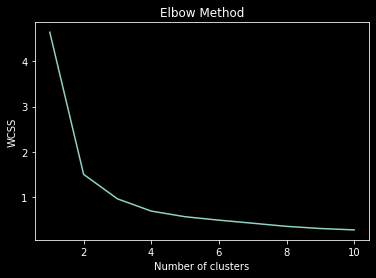

In [8]:
from sklearn.cluster import KMeans
wcss = [] # Contains sum of squared distances of samples to their closest cluster center for each 'k'.
# Trying different values of 'k' from 1 to 11 
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(normalized_rect_region_dim)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

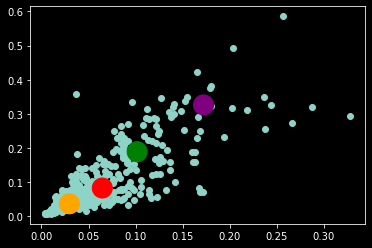

In [9]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(normalized_rect_region_dim)
plt.scatter(normalized_rect_region_dim[:,0], normalized_rect_region_dim[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=400, c=['red', 'purple', 'orange', 'green'])
plt.show()